# Actividad 8: Regresión y multivariate

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
df= pd.read_csv('nhanes_2015_2016.csv')
df.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN


In [5]:
model = sm.OLS.from_formula ('BPXSY1 ~ RIDAGEYR', data = df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1524.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          6.35e-294
Time:                        03:27:01   Log-Likelihood:                -22745.
No. Observations:                5401   AIC:                         4.549e+04
Df Residuals:                    5399   BIC:                         4.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5144      0.619    165.540      0.000     101.300     103.728
RIDAGEYR       0.4692      0.012     39.043      0.000       0.446       0.493
==============================================================================
Omnibus:                      784.418   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1825.182
Skew:                           0.840   Prob(JB):                         0.00
Kurtosis:                       5.299   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

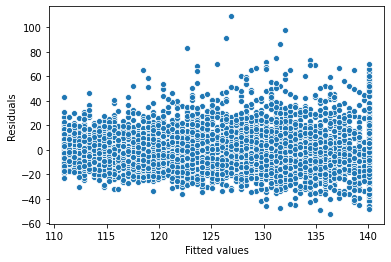

In [7]:
X = result.fittedvalues
Y = result.resid
sns.scatterplot ( x = X, y = Y)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

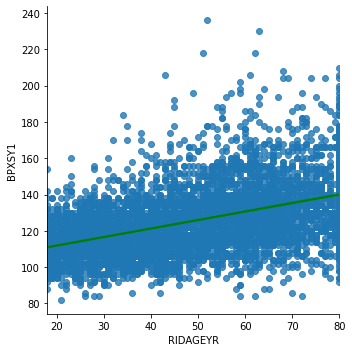

In [10]:
sns.lmplot(x = 'RIDAGEYR', y = 'BPXSY1', data = df, line_kws={'color': 'green'})

In [16]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx',
                           data = df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     574.7
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          9.88e-324
Time:                        03:42:37   Log-Likelihood:                -22409.
No. Observations:                5347   AIC:                         4.483e+04
Df Residuals:                    5343   BIC:                         4.485e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.9966      1.111     82.800      0.000      89.818      94.175
RIAGENDRx[T.Male]     3.7808      0.439      8.607      0.000       2.920       4.642
RIDAGEYR              0.4614      0.012     38.832      0.000       0.438       0.485
BMXBMI                0.3078      0.031      9.802      0.000       0.246       0.369
==============================================================================
Omnibus:                      806.802   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.135
Skew:                           0.852   Prob(JB):                         0.00
Kurtosis:                       5.447   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')